<a href="https://colab.research.google.com/github/NiyonshutiDavid/Intro2ML_Summative/blob/main/Summative_Intro_to_ml_%5BDavid%20Niyonshuti%5D_assignment_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




# The Dataset
> ***Brief Description:***
**Problem Statement**
Despite Rwanda's impressive agricultural development initiatives, smallholder farmers continue to face significant challenges in identifying and managing crop diseases effectively. Current approaches to crop disease management are inadequate for several reasons:

1. Limited Extension Services: Musabyimana et al. (2023) highlighted that Rwanda's extension officer-to-farmer ratio stands at 1:1,400, severely limiting timely access to expert diagnosis when disease symptoms first appear. Their research revealed that farmers typically wait 7-12 days for an extension officer visit, by which time disease spread often becomes unmanageable.
2. Knowledge Gaps: Niyonzima and Habimana (2022) conducted surveys across Rwanda's Eastern Province, finding that only 31% of smallholder farmers could correctly identify common diseases affecting their crops beyond basic visual recognition. The study emphasized how this knowledge gap leads to inappropriate treatment applications, contributing to both economic losses and environmental harm.
3. Connectivity Barriers: Uwamahoro and Bizimana (2023) analyzed technological interventions in Rwandan agriculture, noting that while existing digital solutions show promise, they predominantly require consistent internet connectivity. With only 17% of rural farming areas having reliable internet access, solutions requiring constant connectivity fail to serve the majority of Rwanda's agricultural communities.
4. Cultural and Language Limitations: Mukamana et al. (2024) demonstrated that existing agricultural advisory apps fail to account for linguistic diversity and literacy levels among Rwandan farmers. Their research showed that solutions not incorporating Kinyarwanda and visual interfaces see adoption rates below 8% among target communities.
5. RwandaCropGuard addresses these limitations by developing a locally-adapted, offline-capable classification system specifically designed for Rwandan crops, languages, and farming contexts. Unlike existing solutions that require consistent connectivity or fail to accommodate local varieties and diseases, our approach focuses on creating an accessible, culturally appropriate system that empowers smallholder farmers with immediate diagnostic capabilities.


In [1]:
!pip install numpy pandas scikit-learn imbalanced-learn seaborn matplotlib tensorflow joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 427.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 548.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 MB 1.3 MB/s eta 0:00:0000:0100:05m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 667.6/667.6 kB 2.4 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop , SGD
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib


Matplotlib is building the font cache; this may take a moment.
/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# lOAD THE DATA
data = pd.read_csv('big_startup_secsees_dataset.csv')
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


## Data preprocessing and engineering

In [4]:
print("Dataset description:")
print(data.describe())
print("\n Total rows and columns in the dataset:", data.shape)
data.info()

Dataset description:
       funding_rounds
count    66368.000000
mean         1.732522
std          1.360251
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         19.000000

 Total rows and columns in the dataset: (66368, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  fou

In [5]:
# Check for missing values
print(data.isnull().sum())

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64


In [6]:
# Data Cleaning
# Convert 'funding_total_usd' to numeric, handling non-numeric characters
# Convert date columns to datetime, handling errors
# Handle missing values in 'name', 'category_list', and geographical columns
print("\n--- Data Cleaning Process ---")
# --- 1. Handle 'funding_total_usd' column ---
data['funding_total_usd'] = data['funding_total_usd'].astype(str).str.replace(r'[$,\s]', '', regex=True)
data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')
print(f"Data type of 'funding_total_usd' after conversion: {data['funding_total_usd'].dtype}")
print(f"Missing values in 'funding_total_usd' after conversion: {data['funding_total_usd'].isnull().sum()}")

# --- 2. Handle Date Columns ---
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_columns:
    # Convert to datetime, coercing errors to NaT (Not a Time)
    data[col] = pd.to_datetime(data[col], errors='coerce')
    print(f"Data type of '{col}' after conversion: {data[col].dtype}")
    print(f"Missing values (NaT) in '{col}' after conversion: {data[col].isnull().sum()}")

# --- 3. Handle Other Missing Data ---

# 'name': Drop rows with missing 'name' (only 1 missing, unlikely to lose much data)
if data['name'].isnull().sum() > 0:
    data.dropna(subset=['name'], inplace=True)
    print(f"Dropped rows with missing 'name'. Remaining rows: {len(data)}")


# 'homepage_url': Fill with 'Unknown_Homepage'
data['homepage_url'].fillna('Unknown_Homepage', inplace=True)

# 'category_list': Fill with 'Unknown_Category'
data['category_list'].fillna('Unknown_Category', inplace=True)

# Geographical Columns: Fill with 'Unknown_ColumnName'
geo_cols = ['country_code', 'state_code', 'region', 'city']
for col in geo_cols:
    data[col].fillna(f'Unknown_{col}', inplace=True)

# No general dropna(inplace=True) here to preserve rows with other missing values
# We will handle NaNs in 'funding_total_usd' and date columns specifically after classification

# --- Final Check ---
print("\n--- Data Cleaning Summary ---")
print("Missing values after initial cleaning (before targeted handling):")
print(data.isnull().sum())
print("\nData types after cleaning:")
print(data.dtypes)
print(f"\nDataFrame shape after initial cleaning: {data.shape}")
print("\nFirst few rows of the cleaned dataset:")
data.head()


--- Data Cleaning Process ---
Data type of 'funding_total_usd' after conversion: float64
Missing values in 'funding_total_usd' after conversion: 12785
Data type of 'founded_at' after conversion: datetime64[ns]
Missing values (NaT) in 'founded_at' after conversion: 15225
Data type of 'first_funding_at' after conversion: datetime64[ns]
Missing values (NaT) in 'first_funding_at' after conversion: 27
Data type of 'last_funding_at' after conversion: datetime64[ns]
Missing values (NaT) in 'last_funding_at' after conversion: 0
Dropped rows with missing 'name'. Remaining rows: 66367

--- Data Cleaning Summary ---
Missing values after initial cleaning (before targeted handling):
permalink                0
name                     0
homepage_url             0
category_list            0
funding_total_usd    12785
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at           15

/var/folders/cs/ppk3srb95ps3y695312y8q8h0000gn/T/ipykernel_1680/3805791938.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['homepage_url'].fillna('Unknown_Homepage', inplace=True)
/var/folders/cs/ppk3srb95ps3y695312y8q8h0000gn/T/ipykernel_1680/3805791938.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown_country_code,Unknown_state_code,Unknown_region,Unknown_city,1,NaT,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [7]:
# --- Data Preparation for Classification ---
# --- Company Classification Based on Funding Status ---
# Define the conditions for each class
# We process 'Rejected' first as it's a definitive end-state,
# then 'Funding Eligible' as it signifies success/readiness,
# and finally 'Mentorship Needed' as the default for active but unfunded companies.

conditions = [
    # 1. Rejected
    (data['status'] == 'closed'),

    # 2. Funding Eligible
    (data['status'] == 'acquired') |
    ((data['status'] == 'operating') & (data['funding_total_usd'] > 0)),

    # 3. Mentorship Needed
    # This captures 'operating' companies with 0 or NaN funding_total_usd
    ((data['status'] == 'operating') & ((data['funding_total_usd'] == 0) | (data['funding_total_usd'].isnull())))
]

# Define the corresponding values for each class
choices = ['Rejected', 'Funding Eligible', 'Mentorship Needed']

# Apply the conditions to create the new 'funding_class' column
# Any rows not fitting these conditions (e.g., if there are other 'status' types)
# will be assigned 'Other' or can be left as NaN if you prefer.
data['funding_class'] = np.select(conditions, choices, default='Unclassified')

# --- Verification and Summary ---
print("--- Company Classification Summary ---")
print("\nDistribution of Companies by Funding Class:")
print(data['funding_class'].value_counts())

print("\nCharacteristics of each class (based on defined criteria):")

print("\n1. Rejected Class:")
rejected_companies = data[data['funding_class'] == 'Rejected']
print(f"  - Count: {len(rejected_companies)}")
print(f"  - Status Distribution:\n{rejected_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {rejected_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {rejected_companies['funding_rounds'].mean():.2f}")


print("\n2. Funding Eligible Class:")
eligible_companies = data[data['funding_class'] == 'Funding Eligible']
print(f"  - Count: {len(eligible_companies)}")
print(f"  - Status Distribution:\n{eligible_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {eligible_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {eligible_companies['funding_rounds'].mean():.2f}")


print("\n3. Mentorship Needed Class:")
mentorship_companies = data[data['funding_class'] == 'Mentorship Needed']
print(f"  - Count: {len(mentorship_companies)}")
print(f"  - Status Distribution:\n{mentorship_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {mentorship_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {mentorship_companies['funding_rounds'].mean():.2f}")

# Optional: Check if any companies were 'Unclassified'
if 'Unclassified' in data['funding_class'].unique():
    print(f"\nUnclassified companies count: {data['funding_class'].value_counts().get('Unclassified', 0)}")
    print("These are companies that did not fit the defined criteria for Rejected, Funding Eligible, or Mentorship Needed.")

--- Company Classification Summary ---

Distribution of Companies by Funding Class:
funding_class
Funding Eligible     47989
Mentorship Needed    10594
Rejected              6237
Unclassified          1547
Name: count, dtype: int64

Characteristics of each class (based on defined criteria):

1. Rejected Class:
  - Count: 6237
  - Status Distribution:
status
closed    6237
Name: count, dtype: int64
  - Avg Funding Total USD: 10,900,158.94
  - Avg Funding Rounds: 1.40

2. Funding Eligible Class:
  - Count: 47989
  - Status Distribution:
status
operating    42440
acquired      5549
Name: count, dtype: int64
  - Avg Funding Total USD: 15,385,288.02
  - Avg Funding Rounds: 1.88

3. Mentorship Needed Class:
  - Count: 10594
  - Status Distribution:
status
operating    10594
Name: count, dtype: int64
  - Avg Funding Total USD: nan
  - Avg Funding Rounds: 1.12

Unclassified companies count: 1547
These are companies that did not fit the defined criteria for Rejected, Funding Eligible, or Mentor

In [7]:
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_class
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,Funding Eligible
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Funding Eligible
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown_country_code,Unknown_state_code,Unknown_region,Unknown_city,1,NaT,2014-01-30,2014-01-30,Funding Eligible
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Funding Eligible
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Mentorship Needed


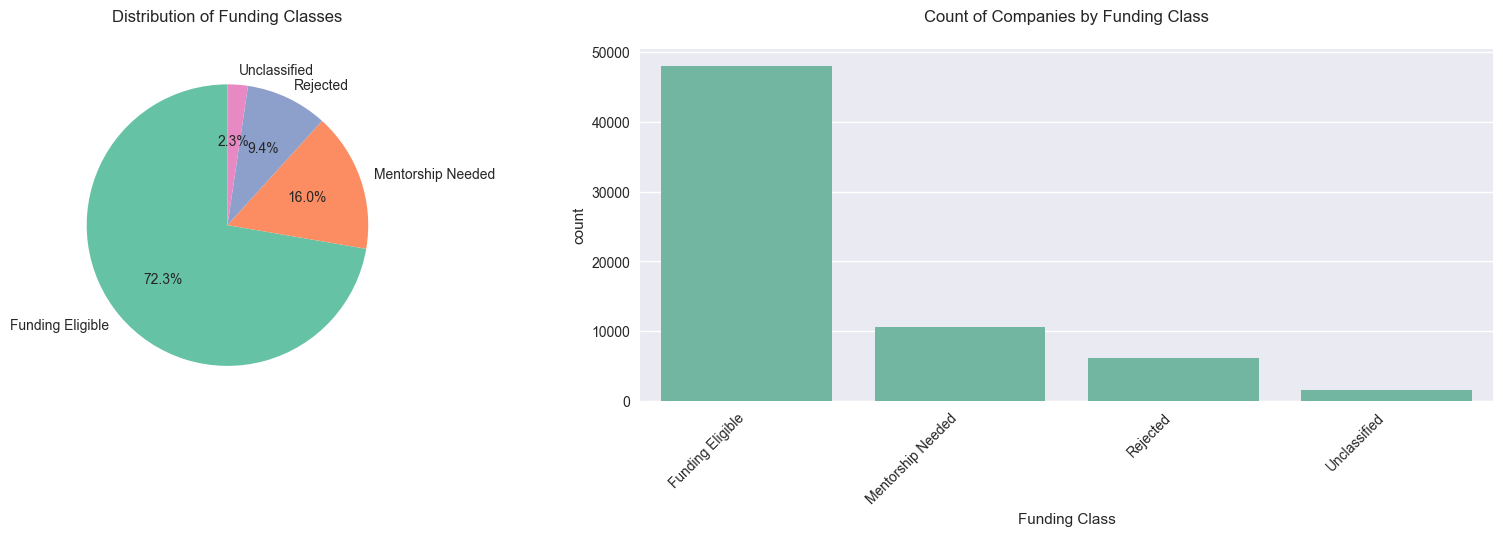

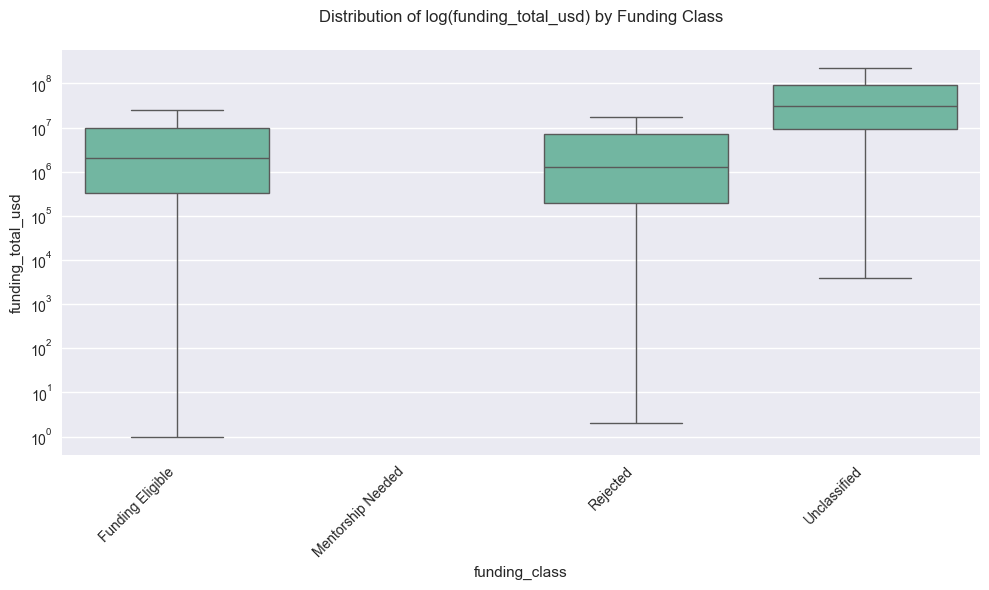

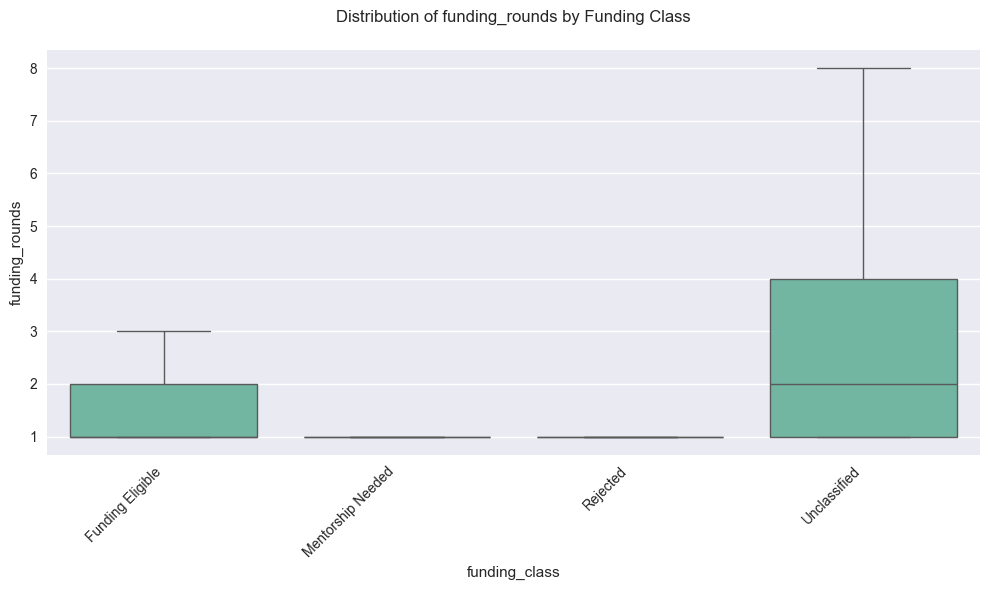

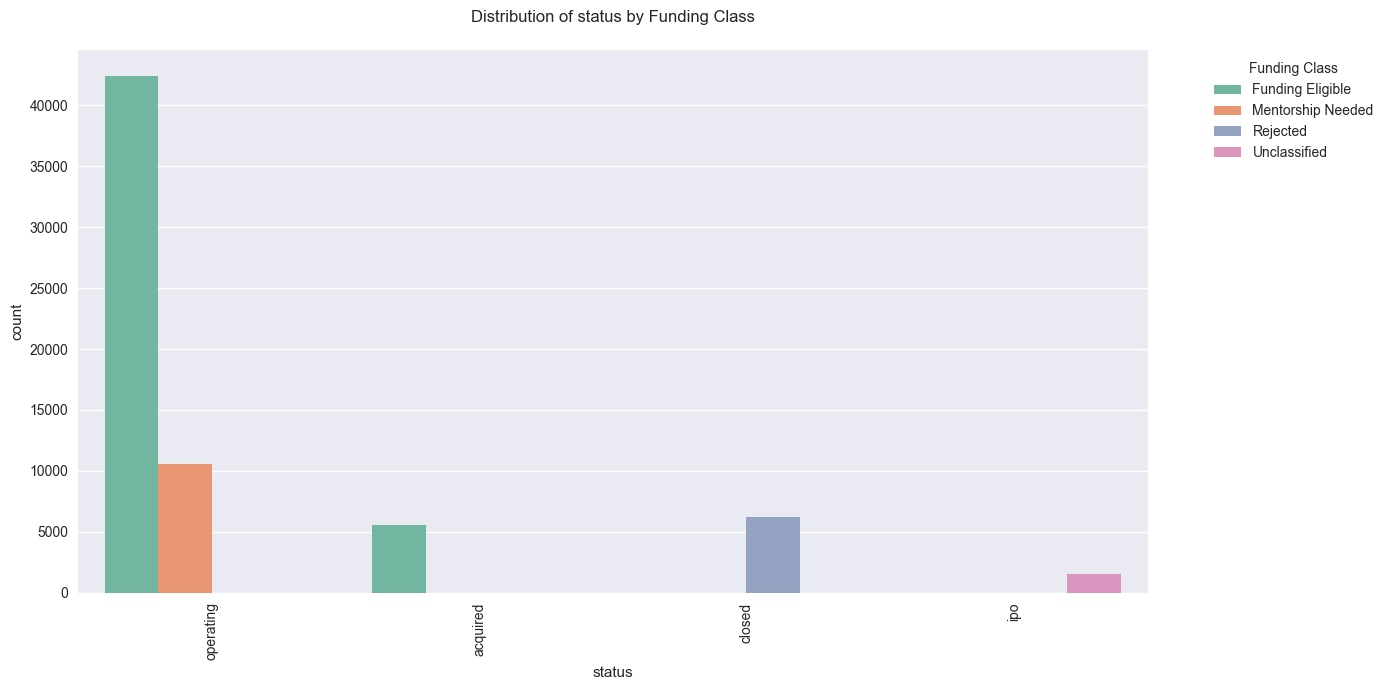

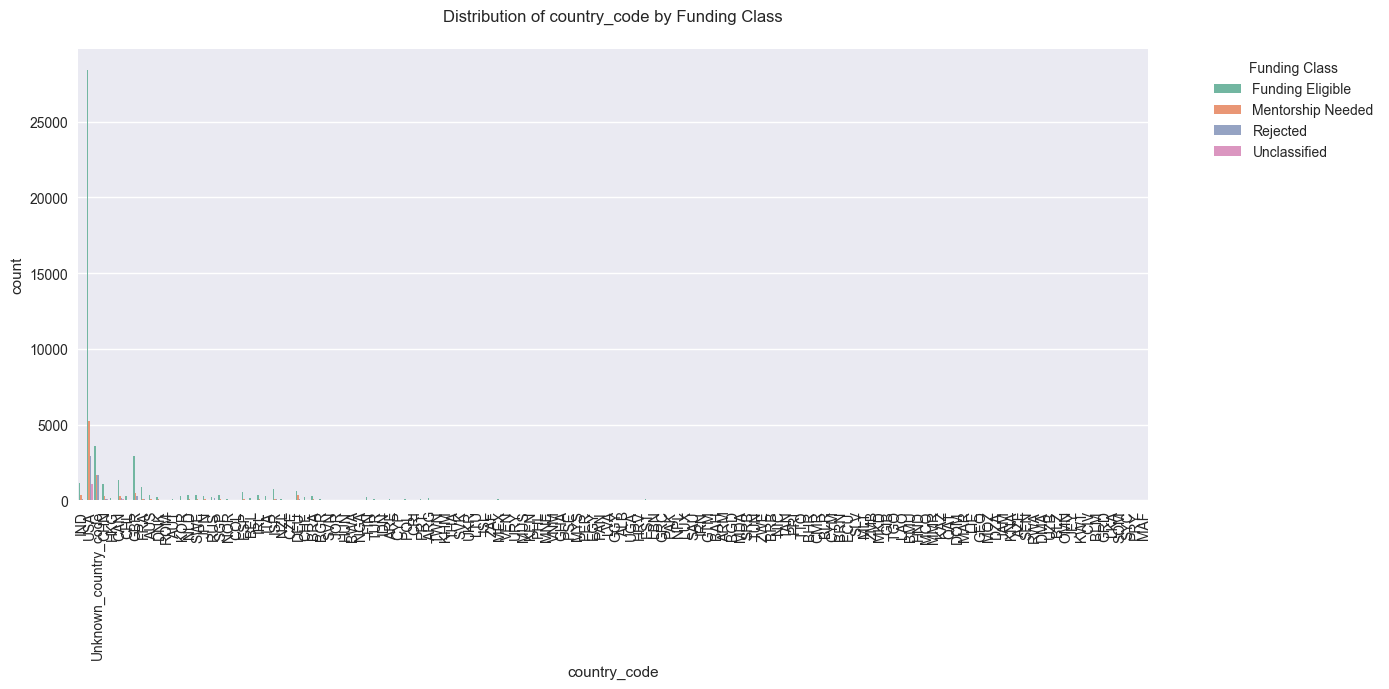

KeyboardInterrupt: 

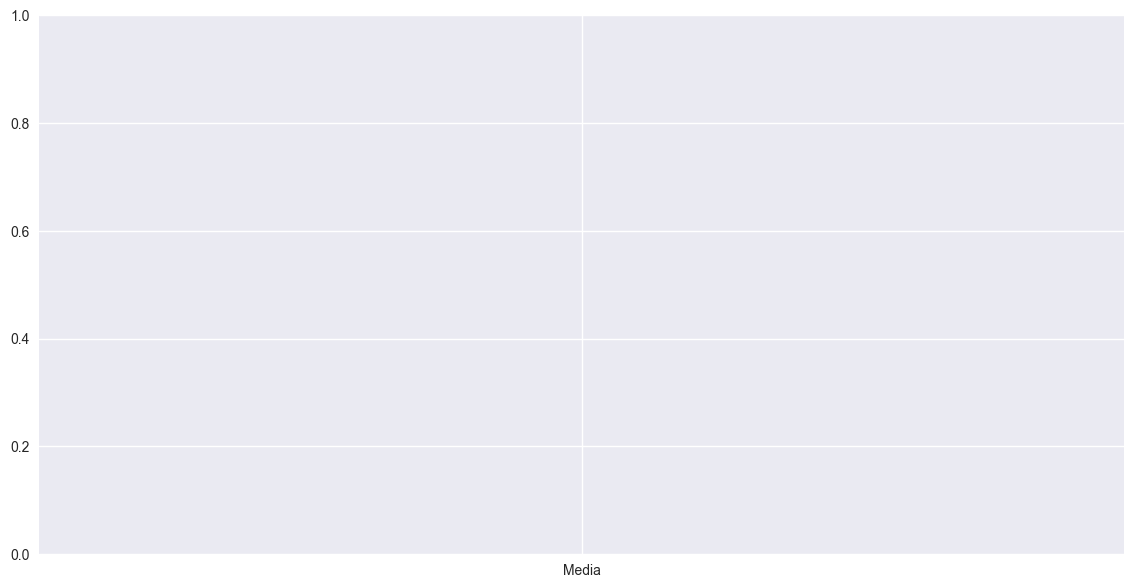

In [8]:
# Visualization of the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set style and palette
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# 1. Distribution of Funding Classes (Optimized)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 2]})

# Pie chart
data['funding_class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax1)
ax1.set_title('Distribution of Funding Classes', pad=20)
ax1.set_ylabel('')

# Bar plot
sns.countplot(data=data, x='funding_class',
             order=data['funding_class'].value_counts().index,
             ax=ax2)
ax2.set_title('Count of Companies by Funding Class', pad=20)
ax2.set_xlabel('Funding Class')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
fig.tight_layout(pad=3.0)
plt.show()

# 2. Numerical Features Distribution (Optimized)
num_features = [col for col in ['funding_total_usd', 'funding_rounds']
               if col in data.columns]

for feature in num_features:
    fig, ax = plt.subplots(figsize=(10, 6))

    if feature == 'funding_total_usd':
        sns.boxplot(data=data, x='funding_class', y=feature,
                   showfliers=False, ax=ax)
        ax.set_yscale('log')
        ax.set_title(f'Distribution of log({feature}) by Funding Class', pad=20)
    else:
        sns.boxplot(data=data, x='funding_class', y=feature,
                   showfliers=False, ax=ax)
        ax.set_title(f'Distribution of {feature} by Funding Class', pad=20)

    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    fig.tight_layout()
    plt.show()

# 3. Categorical Features Distribution (Optimized)
cat_features = ['status', 'country_code', 'category_list']
for feature in cat_features:
    plt.figure(figsize=(14, 7))
    ax = sns.countplot(data=data, x=feature, hue='funding_class')
    ax.set_title(f'Distribution of {feature} by Funding Class', pad=20)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.legend(title='Funding Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 4. Correlation Heatmap (Optimized)
plt.figure(figsize=(12, 10))
corr = data[num_features + ['funding_class']].copy()
corr['funding_class'] = corr['funding_class'].astype('category').cat.codes
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', center=0,
           annot_kws={'size': 10}, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features with Funding Class', pad=20)
plt.tight_layout()
plt.show()

# 5. Pairplot (Optimized)
sns.pairplot(data=data.sample(min(1000, len(data))),  # Sample for performance
            vars=num_features,
            hue='funding_class',
            plot_kws={'alpha': 0.6, 's': 30},
            height=3,
            corner=False)
plt.suptitle('Pairplot of Numerical Features by Funding Class', y=1.02)
plt.tight_layout()
plt.show()

# 6. Stacked Bar Chart (Optimized)
plt.figure(figsize=(14, 7))
pd.crosstab(data['funding_rounds'], data['funding_class']).plot(
    kind='bar', stacked=True, width=0.8)
plt.title('Distribution of Funding Rounds by Funding Class', pad=20)
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Count')
plt.legend(title='Funding Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 7. Violin Plots (Optimized)
plt.figure(figsize=(14, 7))
ax = sns.violinplot(data=data, x='funding_class', y='funding_total_usd',
                   scale='width', inner='quartile', cut=0)
ax.set_yscale('log')
plt.title('Violin Plot of Funding Amounts by Funding Class (log scale)', pad=20)
plt.ylabel('Funding Total USD (log scale)')
plt.xlabel('Funding Class')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 8. Time Series Analysis (Optimized)
if 'founded_at' in data.columns:
    data['founded_year'] = pd.to_datetime(data['founded_at']).dt.year
    plt.figure(figsize=(16, 8))
    ax = sns.countplot(data=data, x='founded_year', hue='funding_class')
    plt.title('Company Founding Year Distribution by Funding Class', pad=20)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.legend(title='Funding Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 9. Cross-tabulation Heatmap (Optimized)
for feature in cat_features:
    plt.figure(figsize=(12, 10))
    ct = pd.crosstab(data[feature], data['funding_class'], normalize='index')
    sns.heatmap(ct, annot=True, fmt='.2f', cmap='YlGnBu',
               annot_kws={'size': 10}, cbar_kws={'shrink': 0.8})
    plt.title(f'Percentage Distribution of Funding Classes by {feature}', pad=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [9]:
# drop the unclassified rows
data = data[data['funding_class'] != 'Unclassified']
# Save the cleaned dataset
data.to_csv('cleaned_big_startup_secsees_dataset.csv', index=False)
# Load the cleaned dataset
data = pd.read_csv('cleaned_big_startup_secsees_dataset.csv')
# Print cleaned dataset
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_class
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,Funding Eligible
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Funding Eligible
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown_country_code,Unknown_state_code,Unknown_region,Unknown_city,1,NaN,2014-01-30,2014-01-30,Funding Eligible
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Funding Eligible
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Mentorship Needed


In [10]:
# Check if all classes are there in the new dataset
print(data['funding_class'].value_counts())

funding_class
Funding Eligible     47989
Mentorship Needed    10594
Rejected              6237
Name: count, dtype: int64


In [11]:
data.isnull().sum()

permalink                0
name                     0
homepage_url             0
category_list            0
funding_total_usd    12679
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at           14865
first_funding_at        27
last_funding_at          0
funding_class            0
dtype: int64

In [12]:
def handle_missing_values_advanced(data):
    """
    Fixed version with proper column handling
    """
    # =================================================================
    # 0. Create temporary columns FIRST
    # =================================================================
    # Convert to datetime safely
    data['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')

    # Create decade column only for rows with valid dates
    data['founded_decade'] = np.where(
        data['founded_at'].notna(),
        (data['founded_at'].dt.year // 10) * 10,
        np.nan
    )

    # =================================================================
    # 1. Funding Amounts (Fixed Implementation)
    # =================================================================
    print("\n💰 Handling funding_total_usd (12,679 missing):")

    # Set known classes to 0
    data.loc[data['funding_class'] == 'Rejected', 'funding_total_usd'] = 0
    data.loc[data['funding_class'] == 'Mentorship Needed', 'funding_total_usd'] = 0

    # For Funding Eligible: Use country + decade if available, otherwise country only
    mask = (data['funding_class'] == 'Funding Eligible') & (data['funding_total_usd'].isna())

    # Try country+decade first
    try:
        medians = data.dropna(subset=['founded_decade']).groupby(
            ['country_code', 'founded_decade'])['funding_total_usd'].median()
        for (country, decade), median_val in medians.items():
            data.loc[
                mask &
                (data['country_code'] == country) &
                (data['founded_decade'] == decade),
                'funding_total_usd'
            ] = median_val
    except:
        pass

    # Fallback: Country-only median
    remaining = mask & data['funding_total_usd'].isna()
    if remaining.any():
        country_medians = data.groupby('country_code')['funding_total_usd'].median()
        for country, median_val in country_medians.items():
            data.loc[remaining & (data['country_code'] == country), 'funding_total_usd'] = median_val

    # Final fallback: Global median
    remaining = data['funding_total_usd'].isna().sum()
    if remaining > 0:
        global_median = data['funding_total_usd'].median()
        data['funding_total_usd'].fillna(global_median, inplace=True)
        print(f"   - Filled {remaining} remaining with global median: ${global_median:,.2f}")

    # =================================================================
    # 2. Founding Dates (14,865 missing)
    # =================================================================
    print("\n📅 Handling founded_at (14,865 missing):")

    # Strategy 1: Use first funding date minus 1 year (common pattern)
    mask = data['founded_at'].isna() & data['first_funding_at'].notna()
    data.loc[mask, 'founded_at'] = (
        pd.to_datetime(data.loc[mask, 'first_funding_at']) - pd.DateOffset(years=1))
    print(f"   - Estimated {mask.sum()} founding dates from first funding")

    # Strategy 2: Use median founding date by country and funding class
    mask = data['founded_at'].isna()
    if mask.any():
        founded_medians = data[
            data['founded_at'].notna()
        ].groupby(['country_code', 'funding_class'])['founded_at'].median()

        for (country, fclass), median_date in founded_medians.items():
            data.loc[
                mask &
                (data['country_code'] == country) &
                (data['funding_class'] == fclass),
                'founded_at'
            ] = median_date
        print(f"   - Estimated {mask.sum() - data['founded_at'].isna().sum()} from peer medians")

    # Strategy 3: Fill remaining with overall median
    remaining = data['founded_at'].isna().sum()
    if remaining > 0:
        overall_median = pd.to_datetime(data['founded_at']).median()
        data['founded_at'].fillna(overall_median, inplace=True)
        print(f"   - Filled {remaining} remaining with overall median date: {overall_median.date()}")

    # =================================================================
    # 3. First Funding Dates (27 missing)
    # =================================================================
    print("\n⏱ Handling first_funding_at (27 missing):")

    # For funded companies missing first date: use founded_at + 1 year
    mask = (
        (data['funding_total_usd'] > 0) &
        data['first_funding_at'].isna() &
        data['founded_at'].notna()
    )
    data.loc[mask, 'first_funding_at'] = (
        pd.to_datetime(data.loc[mask, 'founded_at']) + pd.DateOffset(years=1))
    print(f"   - Estimated {mask.sum()} first funding dates from founding")

    # For others: use last funding date (if available)
    mask = data['first_funding_at'].isna() & data['last_funding_at'].notna()
    data.loc[mask, 'first_funding_at'] = data.loc[mask, 'last_funding_at']
    print(f"   - Used last funding date for {mask.sum()} records")

    # Final cleanup (should be very few remaining)
    remaining = data['first_funding_at'].isna().sum()
    if remaining > 0:
        data.dropna(subset=['first_funding_at'], inplace=True)
        print(f"   - Dropped {remaining} records with no funding timeline")

    # =================================================================
    # 4. Final Validation
    # =================================================================
    print("\n🔍 Missing Values Report:")
    null_report = data.isnull().sum()
    print(null_report[null_report > 0] if null_report.any() else "✅ No missing values remaining")
    print(f"\n📊 Final DataFrame shape: {data.shape}")

    # Cleanup temporary columns
    data.drop(columns=['founded_decade'], errors='ignore', inplace=True)

    return data

# Execute
data = handle_missing_values_advanced(data)


💰 Handling funding_total_usd (12,679 missing):

📅 Handling founded_at (14,865 missing):
   - Estimated 14861 founding dates from first funding
   - Estimated 4 from peer medians

⏱ Handling first_funding_at (27 missing):
   - Estimated 24 first funding dates from founding
   - Used last funding date for 3 records

🔍 Missing Values Report:
founded_decade    14865
dtype: int64

📊 Final DataFrame shape: (64820, 16)


In [13]:
data.isnull().sum()

permalink            0
name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
funding_class        0
dtype: int64

In [14]:
# Save the dataset that have no missing values to handled_dataset.csv
data.to_csv('handled_big_startup_secsees_dataset.csv', index=False)
# Load the dataset again
data = pd.read_csv('handled_big_startup_secsees_dataset.csv')
# Print the dataset
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_class
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,2014-01-05,2015-01-05,2015-01-05,Funding Eligible
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Funding Eligible
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown_country_code,Unknown_state_code,Unknown_region,Unknown_city,1,2013-01-30,2014-01-30,2014-01-30,Funding Eligible
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Funding Eligible
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Mentorship Needed


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE  # For class balancing

# =====================================================================
# 1. Feature Engineering: Extract Year from Date Columns
# =====================================================================
# Ensure date columns are in datetime format (handle potential NaT values)
data['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')
data['first_funding_at'] = pd.to_datetime(data['first_funding_at'], errors='coerce')

# Extract year, handling potential NaT values by setting to NaN
data['founded_year'] = data['founded_at'].dt.year
data['first_funding_year'] = data['first_funding_at'].dt.year

# =====================================================================
# 2. Feature/Target Assignment with Class Verification
# =====================================================================
print("🔍 Verifying class distribution in full dataset:")
print(data['funding_class'].value_counts())

# Features (X) and Target (y)
y = data['funding_class']
X = data[[
    'funding_total_usd',
    'funding_rounds',
    'status',
    'country_code',
    'category_list',
    'founded_year',
    'first_funding_year'
]]

# =====================================================================
# 3. Stratified Splitting (Guarantees All Classes in All Splits)
# =====================================================================
# First split (train+val vs test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.15,
    random_state=42,
    stratify=y
)

# Second split (train vs val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.1765,  # 15% of original
    random_state=42,
    stratify=y_temp
)

# Verify class distribution
print("\n✅ Split Verification:")
for name, split in zip(
    ['Train', 'Validation', 'Test'],
    [(y_train, X_train), (y_val, X_val), (y_test, X_test)]
):
    y_split, X_split = split
    print(f"{name}: {X_split.shape[0]} samples | Classes: {np.unique(y_split, return_counts=True)}")

# =====================================================================
# 4. Preprocessing Pipeline (Handles Numeric/Categorical + Prevents NaN)
# =====================================================================
numeric_features = ['funding_total_usd', 'funding_rounds', 'founded_year', 'first_funding_year']
categorical_features = ['status', 'country_code', 'category_list']

# Numeric pipeline with NaN protection
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# =====================================================================
# 5. Apply Transformations with Class Balancing
# =====================================================================
print("\n🔄 Applying preprocessing...")
X_train_pre = preprocessor.fit_transform(X_train)
X_val_pre = preprocessor.transform(X_val)
X_test_pre = preprocessor.transform(X_test)

# Balance classes (only on training data)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_pre, y_train)

# =====================================================================
# 6. Final Validation
# =====================================================================
print("\n🎯 Final Shapes:")
print(f"X_train_bal: {X_train_bal.shape} (classes: {np.unique(y_train_bal, return_counts=True)})")
print(f"X_val:       {X_val_pre.shape}")
print(f"X_test:      {X_test_pre.shape}")

# Verify no NaNs
assert not np.isnan(X_train_bal).any()
assert not np.isnan(X_val_pre).any()
assert not np.isnan(X_test_pre).any()
print("✓ No NaN values in processed data")

# Get feature names
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, cat_feature_names])
print(f"\n📝 Feature Names ({len(all_feature_names)} total):\n{all_feature_names}")

🔍 Verifying class distribution in full dataset:
funding_class
Funding Eligible     47989
Mentorship Needed    10594
Rejected              6237
Name: count, dtype: int64

✅ Split Verification:
Train: 45372 samples | Classes: (array(['Funding Eligible', 'Mentorship Needed', 'Rejected'], dtype=object), array([33591,  7416,  4365]))
Validation: 9725 samples | Classes: (array(['Funding Eligible', 'Mentorship Needed', 'Rejected'], dtype=object), array([7200, 1589,  936]))
Test: 9723 samples | Classes: (array(['Funding Eligible', 'Mentorship Needed', 'Rejected'], dtype=object), array([7198, 1589,  936]))

🔄 Applying preprocessing...


/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



🎯 Final Shapes:
X_train_bal: (100773, 19667) (classes: (array(['Funding Eligible', 'Mentorship Needed', 'Rejected'], dtype=object), array([33591, 33591, 33591])))
X_val:       (9725, 19667)
X_test:      (9723, 19667)
✓ No NaN values in processed data

📝 Feature Names (19667 total):
['funding_total_usd' 'funding_rounds' 'founded_year' ...
 'category_list_mHealth|Mobile' 'category_list_mHealth|Software'
 'category_list_mHealth|Software|Therapeutics']


# SECTION 1: Model Architecture:
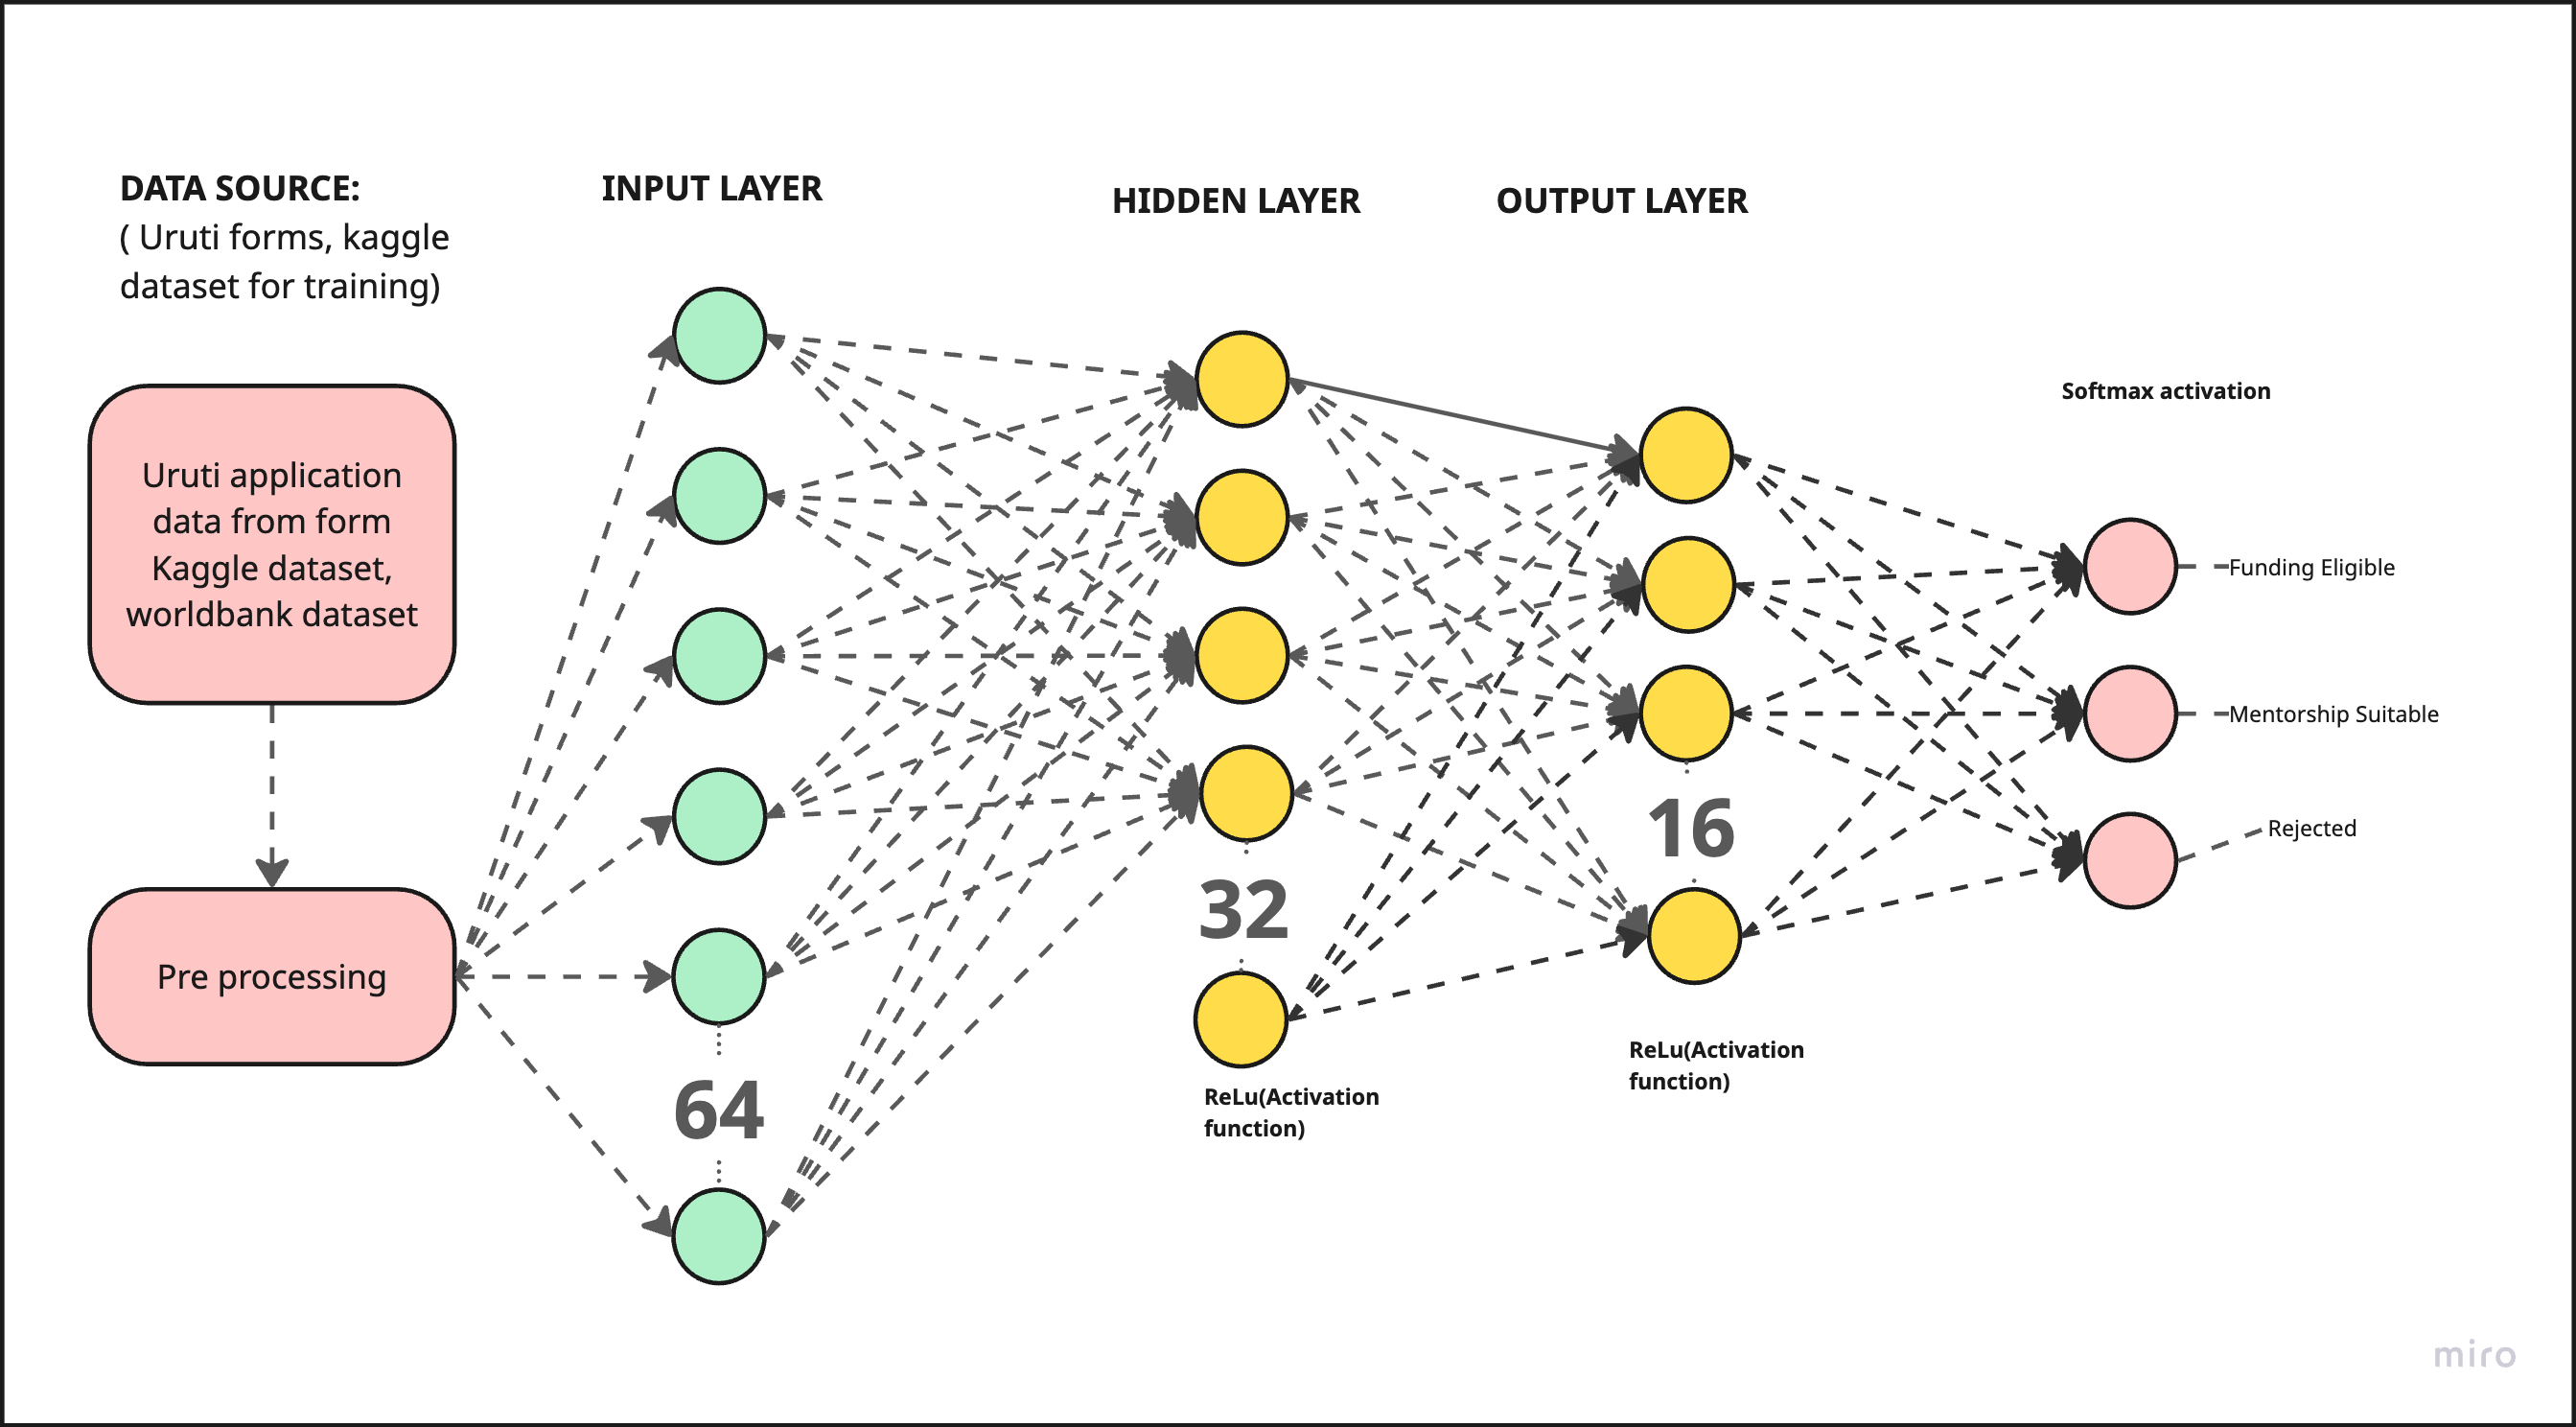

# Task: Define a function that creates models without and With specified Optimization techniques


## Create Classic Logistic Regression Model

In [19]:
def train_logistic_regression(X, y, test_size=0.2, random_state=42):
    """
    Robust logistic regression for 3-class funding prediction
    with complete type safety and class validation
    """

    # ========================
    # 1. Input Validation
    # ========================
    # Convert y to numpy array if needed
    # Ensure y is a numpy array. If it's a pandas Series of objects, np.array will handle it.
    y = np.array(y) if not isinstance(y, np.ndarray) else y

    # Verify we have exactly 3 classes
    unique_classes = np.unique(y)
    assert len(unique_classes) == 3, f"Expected 3 classes, found {len(unique_classes)}"
    print("✓ Verified 3 classes:", unique_classes)

    # ========================
    # 2. NaN Safety Check for X (features)
    # ========================
    # For sparse matrices
    if hasattr(X, "toarray"):
        X_dense = X.toarray()
        if np.isnan(X_dense).any():
            raise ValueError("X contains NaN values - check preprocessing")
    # For dense arrays/DataFrames
    else:
        # If X is a pandas DataFrame, .values converts it to a numpy array
        # This handles cases where X might be a DataFrame with ExtensionArray dtypes (like CategoricalDtype)
        if isinstance(X, pd.DataFrame):
            # Check for NaN in numerical columns
            for col in X.select_dtypes(include=np.number).columns:
                if X[col].isnull().any():
                    raise ValueError(f"X (DataFrame) contains NaN values in numerical column '{col}' - check preprocessing")
            # If there are non-numerical columns that might have "missing" represented differently,
            # you'd need specific checks for those (e.g., empty strings, None)
            # For general purpose, assume numerical NaNs are the primary concern for X.
            X_array = X.values # Convert to numpy array for subsequent operations
        elif pd.api.types.is_extension_array_dtype(X): # This typically means a single Series
            X_array = np.array(X)
            if np.isnan(X_array).any(): # Check if the array version has NaNs
                raise ValueError("X (ExtensionArray converted to np.array) contains NaN values - check preprocessing")
        else: # Assume X is already a numpy array or similar
            X_array = X
            if np.isnan(X_array).any():
                raise ValueError("X (numpy array or similar) contains NaN values - check preprocessing")

    # The original check `if np.isnan(y).any():` for the target variable `y`
    # is removed as `y` is expected to contain string labels, not numbers,
    # so `np.isnan` is not applicable.
    # If you need to check for "missing" string values, you would do it like:
    # if any(val is None or val == '' for val in y):
    #     raise ValueError("y contains missing string values (None or empty string)")


    # ========================
    # 3. Data Splitting
    # ========================
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, # Use original X if it's a DataFrame/sparse matrix, otherwise X_array
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    # ========================
    # 4. Model Training
    # ========================
    model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        multi_class='multinomial',
        class_weight='balanced',
        C=0.5,
        l1_ratio=0.5,
        max_iter=2000,
        random_state=random_state,
        n_jobs=-1
    )

    # Ensure X_train is a numpy array if it was a DataFrame initially,
    # as LogisticRegression expects numerical input.
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.values

    model.fit(X_train, y_train)

    # ========================
    # 5. Evaluation
    # ========================
    # Ensure X_test is a numpy array if it was a DataFrame initially
    if isinstance(X_test, pd.DataFrame):
        X_test = X_test.values

    y_pred = model.predict(X_test)

    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred,
                             target_names=['Rejected', 'Funding Eligible', 'Mentorship Needed']))

    return model

## Create a function to create model

In [21]:

def define_model(optimizer_name=None,
                 regularizer_type=None,
                 early_stopping=False,
                 dropout_rate=0.0,
                 learning_rate=None,
                 input_shape=(X_train_bal.shape[1]),
                 num_classes=3):

    model = Sequential()

    # Choose regularization if specified
    reg = None
    if regularizer_type == 'l2':
        reg = l2(0.001)
    elif regularizer_type == 'l1':
        reg = l1(0.001)

    # ========== Layer definitions ==========
    model.add(Dense(64, activation='relu', input_shape=input_shape, kernel_regularizer=reg))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(32, activation='relu',kernel_regularizer=reg))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(16, activation='relu',kernel_regularizer=reg))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    # ========== Optimizer ==========
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate) if learning_rate else Adam()
    elif optimizer_name == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate) if learning_rate else RMSprop()
    else:
        optimizer = 'adam'  # fallback/default

    # ========== Compile ==========
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # ========== EarlyStopping Callback ==========
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

    return model, callbacks


## Model evalution

In [22]:
def evaluate_model(model, X_test, y_test,show=True):
    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    if show:
        print("\n📊 Classification Report:\n")
        print(classification_report(y_test, y_pred))
        print(f"✅ Accuracy:  {acc:.4f}")
        print(f"✅ Precision: {prec:.4f}")
        print(f"✅ Recall:    {rec:.4f}")
        print(f"✅ F1 Score:  {f1:.4f}")

    # Confusion Matrix
    if show:
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('🌀 Confusion Matrix')
        plt.show()

    # ROC-AUC
    try:
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        if show:
            print(f"✅ ROC AUC Score: {roc_auc:.4f}")
    except:
        print("⚠️ Could not calculate ROC AUC — ensure y_test and y_prob formats are correct.")

    return acc, prec, rec, f1, roc_auc if 'roc_auc' in locals() else None


# Task: Print out the Final Model Accuracy and plot the Loss curve

In [23]:
def loss_curve_plot(history):
    """Plot training and validation loss curves from model history.

    Args:
        history: A Keras History object containing training metrics.
    """
    plt.figure(figsize=(10, 6))  # Set a proper figure size

    epochs = range(len(history.history['loss']))

    # Plot with better marker styles and line widths
    plt.plot(epochs, history.history['loss'], 'bo-', linewidth=2, markersize=6, label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'r^-', linewidth=2, markersize=6, label='Validation loss')

    plt.title('Training and Validation Loss', fontsize=14, pad=20)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Improve legend positioning and appearance
    plt.legend(fontsize=12, framealpha=1, facecolor='white')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

## Model Instances

### classic logistic regression

In [24]:
logistic_model = train_logistic_regression(X_train_bal, y_train_bal)

✓ Verified 3 classes: ['Funding Eligible' 'Mentorship Needed' 'Rejected']


/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


KeyboardInterrupt: 

### instance 1

In [ ]:
model_1, callbacks_1 = define_model(input_shape=X_train_bal.shape[1:], num_classes=len(np.unique(y_train_bal)),)
history_1 = model_1.fit(X_train_bal, y_train_bal, validation_split=0.2, epochs=50, batch_size=42, verbose=1)
loss_curve_plot(history_1)
evaluate_model(model_1, X_test_pre, y_test)



### instance 2

In [ ]:
model_2, callbacks_2 = define_model(
    optimizer_name='Adam',
    dropout_rate=0.3,
    learning_rate=0.001,
    early_stopping=True,
    input_shape=X_train_bal.shape[1:],
    num_classes=len(np.unique(y_train_bal))
)

history_2 = model_2.fit(
    X_train_bal, y_train_bal,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=callbacks_2,
    verbose=1
)

loss_curve_plot(history_2)

evaluate_model(model_2, X_test_pre, y_test)


### instance 3

In [ ]:
model_3, callbacks_3 = define_model(
    optimizer_name='RMSprop',
    regularizer_type='l2',
    dropout_rate=0.2,
    learning_rate=0.0005,
    early_stopping=True,
    input_shape=X_train_bal.shape[1:], num_classes=len(np.unique(y_train_bal))
)
history_3 = model_3.fit(X_train_bal, y_train_bal, validation_split=0.2, epochs=500, batch_size=32, callbacks=callbacks_3, verbose=1)
loss_curve_plot(history_3)
evaluate_model(model_3, X_test_pre, y_test)


### instance 4

In [ ]:
model_4, callbacks_4 = define_model(
    optimizer_name='Adam',
    regularizer_type='l1',
    learning_rate=0.0001,
    early_stopping=True,
    input_shape=X_train_bal.shape[1:], num_classes=len(np.unique(y_train_bal))
)
history_4 = model_4.fit(X_train_bal, y_train_bal, validation_split=0.2, epochs=500, batch_size=42, callbacks=callbacks_4, verbose=1)
loss_curve_plot(history_4)
evaluate_model(model_4, X_test_pre, y_test)


### instance 5

In [ ]:
model_5, callbacks_5 = define_model(
    optimizer_name='SDG',
    # dropout_rate=0.001,
    regularizer_type='l1',
    learning_rate=0.0006,
    early_stopping=True,
    input_shape=X_train_bal.shape[1:], num_classes=len(np.unique(y_train_bal))
)
history_5 = model_5.fit(X_train_bal, y_train_bal, validation_split=0.2, epochs=500, batch_size=32, callbacks=callbacks_5, verbose=1)
loss_curve_plot(history_5)
evaluate_model(model_5, X_test_pre, y_test)


# Save the best model compare all model

In [ ]:
# Evaluate all models and select the best one
results = {}
models = [model_1, model_2, model_3, model_4, model_5]

for i, model in enumerate(models, start=1):
    print(f"\n🔍 Evaluating model_{i}")

    # Compute basic metrics
    acc, prec, rec, f1, roc_auc = evaluate_model(model, X, y, show=False)

    results[f"model_{i}"] = {
        "model": model,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
    }

# Create DataFrame (excluding model objects)
results_df = pd.DataFrame({
    name: {k: v for k, v in metrics.items() if k != 'model'}
    for name, metrics in results.items()
}).T

# Display full metrics sorted by F1
print("\n📋 All Models Performance (sorted by F1):")
print(results_df.sort_values(by="f1", ascending=False))

# Select best model: prioritize F1 > ROC AUC > Accuracy
def model_score(metrics):
    return (
        metrics["f1"],
        metrics["roc_auc"] if metrics["roc_auc"] is not None else 0,
        metrics["accuracy"]
    )

best_model_name = max(results, key=lambda k: model_score(results[k]))
best_model_metrics = results[best_model_name]
best_model = best_model_metrics["model"]

# Final output
print(f"\n🏆 Best model: {best_model_name}")
print("📌 Metrics:")
print(f"  F1 Score:   {best_model_metrics['f1']:.4f}")
if best_model_metrics["roc_auc"] is not None:
    print(f"  ROC AUC:    {best_model_metrics['roc_auc']:.4f}")
print(f"  Accuracy:   {best_model_metrics['accuracy']:.4f}")
print(f"  Precision:  {best_model_metrics['precision']:.4f}")
print(f"  Recall:     {best_model_metrics['recall']:.4f}")
# 📤 Save the best model to disk
model_filename = f"{best_model_name}.pkl"
joblib.dump(best_model, model_filename)
print(f"\n💾 Best model saved to: {model_filename}")

## Model Summarries

In [ ]:
## Model Summarries
model_1.summary()

In [ ]:
model_2.summary()

In [ ]:
model_3.summary()


In [ ]:
model_4.summary()


In [ ]:
model_5.summary()

# Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
from joblib import load
def make_predictions(model_path, X):
    # Load the trained model from file
    model = load(model_path)

    # Check if classifier supports probability prediction
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)
        predictions = np.argmax(y_prob, axis=1)
    else:
        predictions = model.predict(X)

    return predictions


In [ ]:
import numpy as np

# Index of the sample you want to predict
idx = 1

# Prepare input with batch dimension
single_input = np.expand_dims(X_test_pre[idx], axis=0)

# Make prediction (assuming model outputs probabilities)
preds = make_predictions("model_4.pkl", single_input)

# Actual label
actual_label = y_test[idx]

# Extract the predicted probabilities for the first sample
pred_probs = preds[0]  # e.g. [0.0651, 0.0179, 0.9170]

# Get the predicted class as the index with the max probability
pred_label = np.argmax(pred_probs)

print(f"Actual label:    {actual_label}")
print(f"Predicted label: {pred_label}")
print(f"Probabilities:   {pred_probs}")


Congratulations!!
